<a href="https://colab.research.google.com/github/Bmiami988/Spotify-Songs-Analysis/blob/main/spotify_songs_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/spotify_tracks.csv')
print(df.columns.to_list())

['track_id', 'name', 'artists', 'duration_ms', 'popularity', 'explicit', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']




1.   Convert Milliseconds to Seconds for duration
2.   Extract release year from release date




In [2]:
df['duration_sec'] = df['duration_ms'] / 1000
df.drop('duration_ms', axis=1, inplace=True)
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
print(df.columns.to_list())

['track_id', 'name', 'artists', 'popularity', 'explicit', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_sec', 'release_year']




1.   Number of Rows
2.   Number of Columns
3.   Tracks with Missing values
4.   Tracks with Duplicate values
5.   Total Number of Tracks




In [3]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Tracks with missing values:\n{df.isnull().sum()}")
print(f"Tracks with duplicate values:\n{df.duplicated().sum()}")
print(f"Track number: {len(df)}")

Number of rows: 5000
Number of columns: 20
Tracks with missing values:
track_id              0
name                  0
artists               0
popularity            0
explicit              0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness         250
acousticness        250
instrumentalness      0
liveness            250
valence               0
tempo                 0
time_signature        0
duration_sec          0
release_year          0
dtype: int64
Tracks with duplicate values:
0
Track number: 5000


In [5]:
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df['primary_artist'] = df['artists'].str.split(' , ').str[0]
artist_features = df.groupby('primary_artist')[audio_features].mean().reset_index()
print(artist_features)

                      primary_artist  danceability    energy  key   loudness  \
0          Aaron Grimes, Joshua Hunt      0.724814  0.527940  9.0  -7.010322   
1                      Aaron Hawkins      0.631707  0.759441  3.0  -8.754922   
2                        Aaron Klein      0.731432  0.782463  3.0  -4.317617   
3                        Aaron Moore      0.735459  1.000000  4.0 -11.547708   
4     Aaron Nguyen MD, Monica Rangel      0.818833  0.722280  6.0  -4.550178   
...                              ...           ...       ...  ...        ...   
4912                  Zachary Thomas      0.500499  0.503242  9.0 -11.905622   
4913                 Zachary Vazquez      0.484104  0.732039  8.0  -7.540896   
4914    Zachary Walsh, Andrew Thomas      0.711527  0.666474  6.0  -9.093281   
4915                   Zachary White      0.573793  0.884938  0.0  -3.270927   
4916                  Zachary Wilson      0.677028  0.969762  4.0  -7.839456   

      mode  speechiness  acousticness  

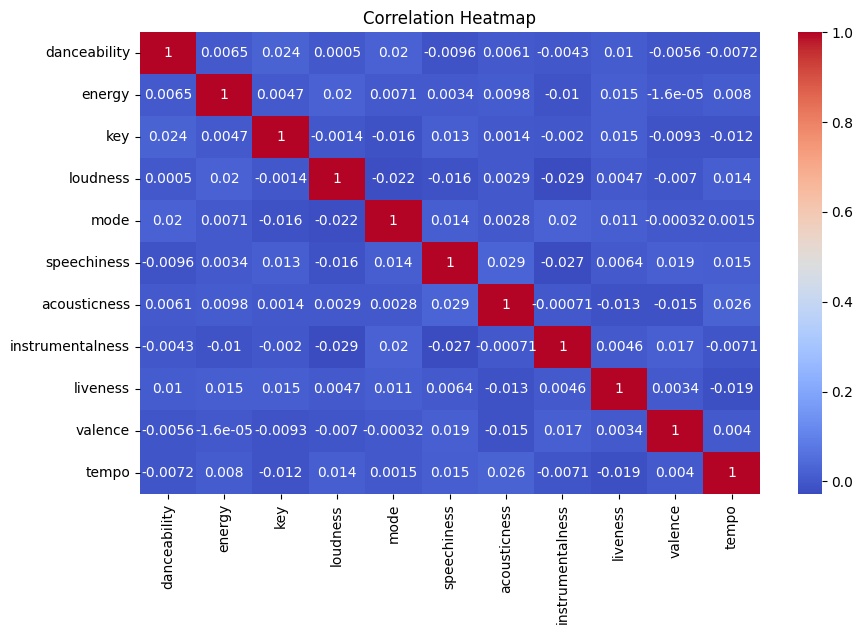

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df[audio_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


*# POPULARITY ANALYSIS*

- Here we group songs by release year
- Filter out years with less than 10 songs

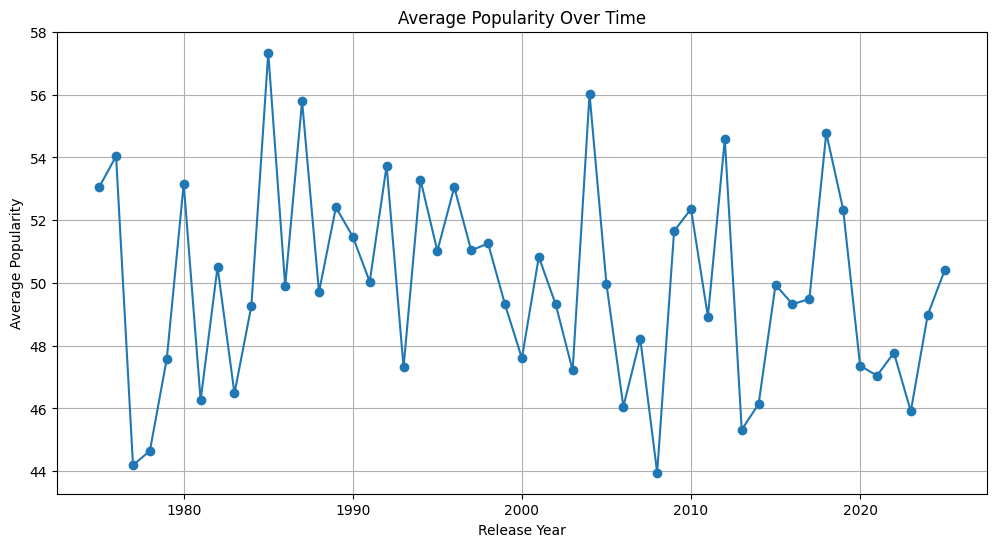

In [8]:
yearly_stats = df.groupby('release_year')['popularity'].agg(['mean', 'count'])
yearly_stats = yearly_stats[yearly_stats['count'] >= 10]
plt.figure(figsize=(12, 6))
plt.plot(yearly_stats.index, yearly_stats['mean'], marker='o', linestyle='-')
plt.title('Average Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

In [10]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.to_csv('cleaned_spotify_tracks.csv', index=False)
print(df.isnull().sum())
print(df.duplicated().sum())

track_id            0
name                0
artists             0
popularity          0
explicit            0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_sec        0
release_year        0
primary_genre       0
primary_artist      0
dtype: int64
0


In [12]:
feature_stats = df[audio_features].describe()
print(feature_stats)

top_ten_artists = df.groupby('primary_artist')['popularity'].mean().nlargest(10)
print(top_ten_artists)



       danceability       energy          key     loudness         mode  \
count   4289.000000  4289.000000  4289.000000  4289.000000  4289.000000   
mean       0.601786     0.699807     5.539986    -7.989328     0.500350   
std        0.150354     0.146494     3.411918     2.926815     0.500058   
min        0.054720     0.121544     0.000000   -18.485136     0.000000   
25%        0.500943     0.599595     3.000000   -10.042089     0.000000   
50%        0.601573     0.701681     6.000000    -7.967908     1.000000   
75%        0.701782     0.806034     9.000000    -5.979736     1.000000   
max        1.000000     1.000000    11.000000     0.000000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  4289.000000   4289.000000       4289.000000  4289.000000  4289.000000   
mean      0.108895      0.289254          0.100904     0.206187     0.501989   
std       0.088280      0.263025          0.099245     0.135831     0.196677   
min 